# Knn algorithm with drug200 dataset
## Overview
- this lab is a simple educational project to get acquinted with machine learning basics, the libraries, and the algorithms.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [63]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [11]:
# setting the features and the target
X = df.iloc[:, [0, 1, 2, 3, 4]].values
y = df.iloc[:, 5].values

In [35]:
# transform the non numeric columns to numeric type
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
for i in range(1,4):
    X[:,i] = le.fit_transform(X[:,i])

In [37]:
# spliting the data to training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [41]:
# Normalizing data
from sklearn.preprocessing import Normalizer
scaler= Normalizer().fit(X_train) # the scaler is fitted to the training set
normalized_x_train= scaler.transform(X_train) # the scaler is applied to the training set
normalized_x_test= scaler.transform(X_test) # the scaler is applied to the test set

In [43]:
print('x train before Normalization')
print(X_train)
print('\nx train after Normalization')
print(normalized_x_train)

#standerizing data
from sklearn.preprocessing import StandardScaler
standScaler=StandardScaler()

x train before Normalization
[[42 0 0 0 21.036]
 [29 1 0 0 12.856]
 [31 1 0 0 30.366]
 [65 0 1 1 13.769]
 [51 0 1 1 23.003]
 [45 1 1 1 8.37]
 [60 1 2 0 15.171]
 [26 1 1 1 20.909]
 [32 0 0 1 10.292]
 [74 1 0 1 15.436]
 [28 0 2 0 19.675]
 [53 0 0 1 12.495]
 [18 0 0 0 37.188]
 [56 0 0 0 25.395]
 [22 1 1 0 8.151]
 [33 0 1 0 33.486]
 [18 0 2 1 8.75]
 [30 0 2 0 10.443]
 [73 0 2 0 19.221]
 [65 1 0 1 11.34]
 [52 1 1 1 32.922]
 [58 0 1 0 38.247]
 [59 0 2 0 13.884]
 [32 0 0 1 25.974]
 [72 0 1 1 14.642]
 [29 0 0 0 29.45]
 [68 0 0 1 10.189]
 [21 0 0 1 28.632]
 [67 1 2 1 10.898]
 [51 0 2 0 13.597]
 [69 0 2 0 10.065]
 [62 1 2 0 16.594]
 [35 0 0 0 12.894]
 [45 0 0 0 12.854]
 [39 1 0 0 9.664]
 [50 0 2 1 17.211]
 [23 1 2 0 16.85]
 [50 0 2 0 12.703]
 [49 0 2 1 9.381]
 [64 0 1 1 25.741]
 [47 1 0 0 10.403]
 [37 0 0 0 13.091]
 [51 1 0 1 11.343]
 [56 0 1 0 11.567]
 [72 1 0 1 9.677]
 [67 1 1 1 20.693]
 [47 1 1 0 10.114]
 [34 1 0 0 18.703]
 [55 0 0 0 10.977]
 [52 1 2 0 9.894]
 [23 1 2 0 12.26]
 [47 0 1 0 11.7

In [45]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(normalized_x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(normalized_x_test)

In [47]:
#Evaluating predictions
cm = confusion_matrix(y_test, y_pred)
cm

array([[18,  0,  0,  0,  1],
       [ 0,  2,  1,  0,  0],
       [ 1,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  1],
       [ 5,  0,  0,  0,  9]], dtype=int64)

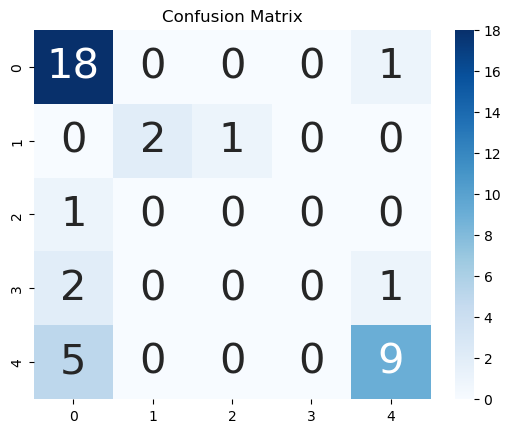

In [49]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
## https://www.kaggle.com/agungor2/various-confusion-matrix-plots
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [51]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.725


In [53]:

#Using cross-validation for parameter tuning
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, normalized_x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
#from scipy import stats
#stats.mode(a, keepdims=True)

<Figure size 640x480 with 0 Axes>

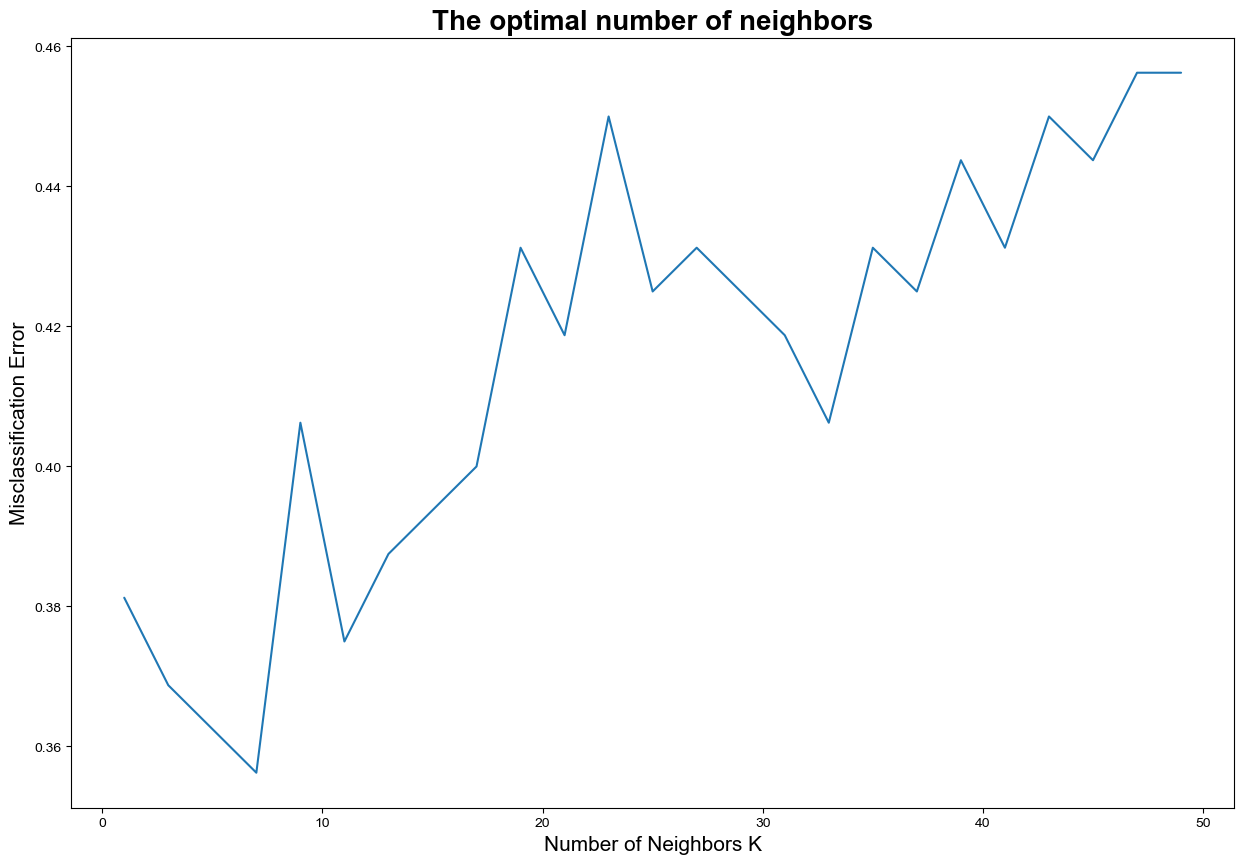

In [55]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [57]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 7.
